# <center> Регрессия, регуляризация
## <center> Прогноз числа прокатов велосипедов

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('bikes_rent.csv')

In [3]:
data.shape

(731, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
season            731 non-null int64
yr                731 non-null int64
mnth              731 non-null int64
holiday           731 non-null int64
weekday           731 non-null int64
workingday        731 non-null int64
weathersit        731 non-null int64
temp              731 non-null float64
atemp             731 non-null float64
hum               731 non-null float64
windspeed(mph)    731 non-null float64
windspeed(ms)     731 non-null float64
cnt               731 non-null int64
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


In [5]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [6]:
data['season'].value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

In [7]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872077,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

#plt.rcParams['figure.figsize'] = (12, 8)

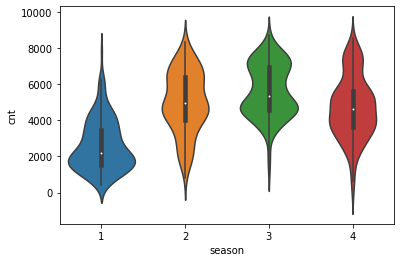

In [9]:
sns.violinplot(data['season'], data['cnt']);

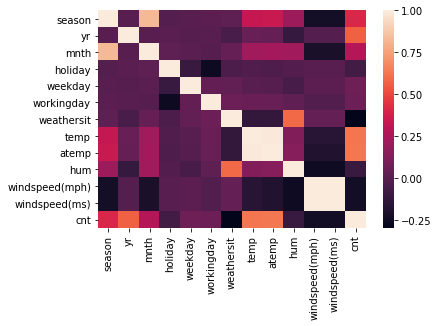

In [10]:
sns.heatmap(data.corr());

In [11]:
data.shape

(731, 13)

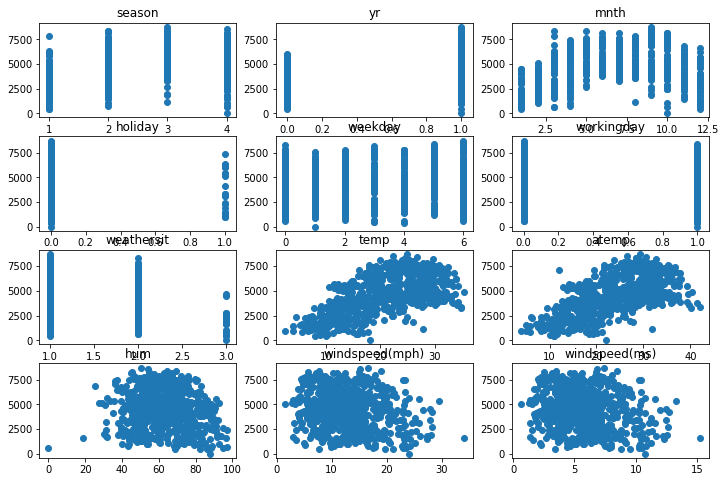

In [12]:
for i, col in enumerate(data.columns[:-1]):
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.subplot(4, 3, i + 1)
    plt.scatter(data[col], data['cnt'])
    plt.title(col)

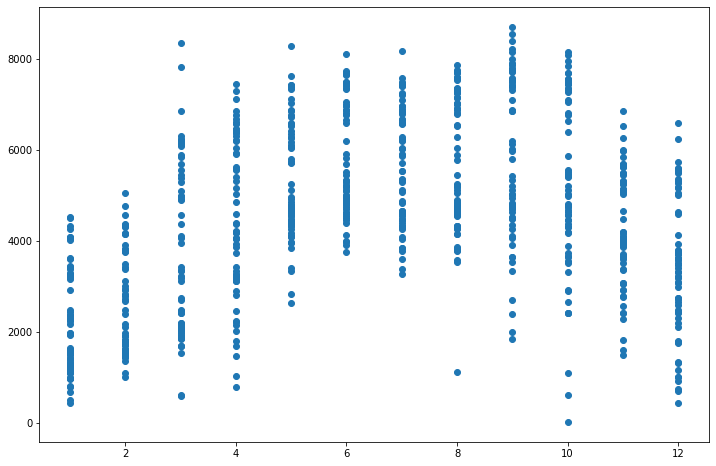

In [13]:
plt.scatter(data.mnth, data.cnt);

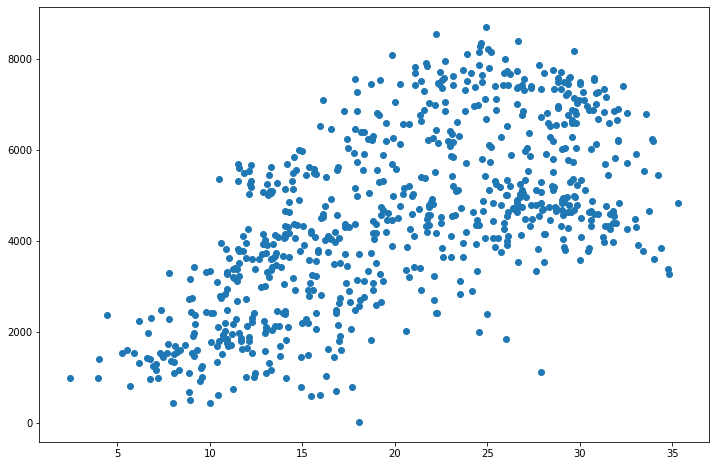

In [14]:
plt.scatter(data.temp, data.cnt);

In [15]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [16]:
linreg = LinearRegression()
lasso = Lasso(random_state=17)
ridge = Ridge(random_state=17)
lasso_cv = LassoCV(random_state=17)
ridge_cv = RidgeCV()

In [17]:
X, y = data.drop('cnt', axis=1).values, data['cnt'].values

In [18]:
train_part_size = int(.7 * X.shape[0])

X_train, X_valid = X[:train_part_size, :], X[train_part_size:, :]
y_train, y_valid = y[:train_part_size], y[train_part_size:]


In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [20]:
linreg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
np.sqrt(mean_squared_error(y_valid, linreg.predict(X_valid_scaled)))

1121.7948196341106

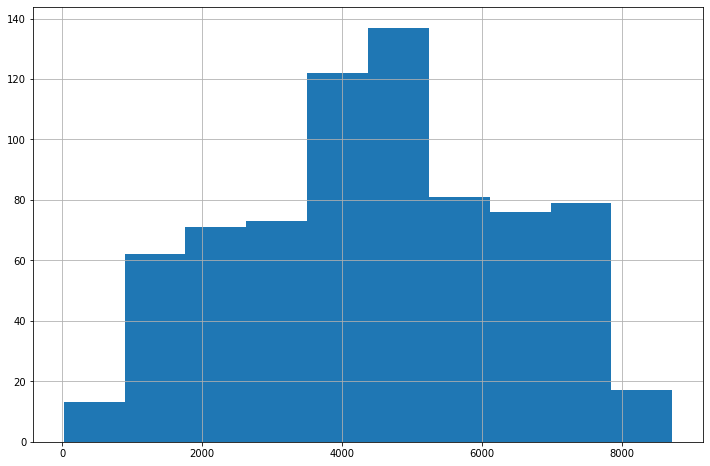

In [22]:
data['cnt'].hist();

In [23]:
pd.DataFrame(linreg.coef_, 
             data.columns[:-1], columns=['coef']).sort_values(by='coef',
                                                             ascending=False)

,coef
windspeed(ms),3.048097e+12
yr,9.540702e+02
atemp,8.911671e+02
season,4.048569e+02
weekday,1.037111e+02
temp,6.249081e+01
mnth,3.080960e+01
workingday,1.470184e+01
holiday,-6.757382e+01
hum,-1.589777e+02


In [24]:
def train_validate_report(model, X_train_scaled, y_train,
                         X_valid_scaled, y_valid, feature_names,
                         forest=False):
    """
    For linear models and regression trees
    """
    model.fit(X_train_scaled, y_train)
    print("MSE=%f" % np.sqrt(mean_squared_error(y_valid, 
                                     model.predict(X_valid_scaled))))
    print("Model coefficients:")
    coef = model.feature_importances_ if forest else model.coef_
    coef_name = 'Importance' if forest else 'Coef'

    print(pd.DataFrame(coef, 
             feature_names, columns=[coef_name]).sort_values(by=coef_name,
                                                        ascending=False))

In [25]:
train_validate_report(lasso, X_train_scaled, y_train,
                         X_valid_scaled, y_valid, 
                      feature_names=data.columns[:-1])

MSE=1120.721409
Model coefficients:
                      Coef
yr              952.804560
atemp           877.159813
season          403.416439
weekday         102.643044
temp             75.953962
mnth             29.857599
workingday       14.173377
windspeed(ms)    -0.000000
holiday         -67.073435
hum            -157.547615
windspeed(mph) -187.341353
weathersit     -293.177257


In [26]:
train_validate_report(lasso_cv, X_train_scaled, y_train,
                         X_valid_scaled, y_valid, 
                      feature_names=data.columns[:-1])

C:\Users\Olya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


MSE=1241.823261
Model coefficients:
                      Coef
atemp           886.374386
yr              784.305733
season          272.280614
weekday          12.617944
mnth              0.000000
holiday          -0.000000
workingday        0.000000
temp              0.000000
windspeed(ms)    -0.000000
hum              -9.823886
windspeed(mph)  -77.728632
weathersit     -279.739913


In [27]:
train_validate_report(ridge, X_train_scaled, y_train,
                         X_valid_scaled, y_valid, 
                      feature_names=data.columns[:-1])

MSE=1119.560520
Model coefficients:
                      Coef
yr              954.075878
atemp           730.747340
season          400.114172
temp            221.406072
weekday         103.198680
mnth             34.687740
workingday       15.334339
holiday         -69.046689
windspeed(ms)   -95.819798
windspeed(mph)  -95.819798
hum            -157.702520
weathersit     -293.899386


In [28]:
train_validate_report(ridge_cv, X_train_scaled, y_train,
                         X_valid_scaled, y_valid, 
                      feature_names=data.columns[:-1])

MSE=1118.903543
Model coefficients:
                      Coef
yr              934.401985
atemp           534.482125
temp            410.485392
season          375.585733
weekday         100.838401
mnth             48.142392
workingday       16.165284
holiday         -70.019251
windspeed(ms)   -97.770430
windspeed(mph)  -97.770430
hum            -155.174377
weathersit     -291.035853


In [29]:
forest = RandomForestRegressor(random_state=17, n_estimators=500)

In [30]:
train_validate_report(forest, X_train, y_train,
                         X_valid, y_valid, 
                      feature_names=data.columns[:-1], forest=True)

MSE=1046.960772
Model coefficients:
                Importance
temp              0.298609
atemp             0.243309
yr                0.199314
hum               0.070565
season            0.062295
weathersit        0.030535
mnth              0.027786
windspeed(mph)    0.020349
weekday           0.019819
windspeed(ms)     0.019613
workingday        0.005191
holiday           0.002615


# ***
# Улучшить скор в Bikes notebook прокатов велосипедов
# ***

In [31]:
df = pd.DataFrame()
df = data.drop(['mnth', 'windspeed(ms)', 'atemp'], axis=1)

In [32]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872077,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


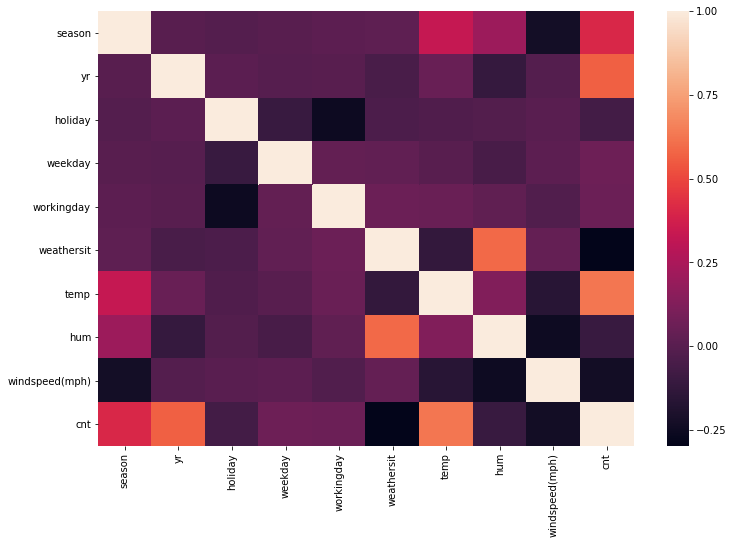

In [33]:
sns.heatmap(df.corr());

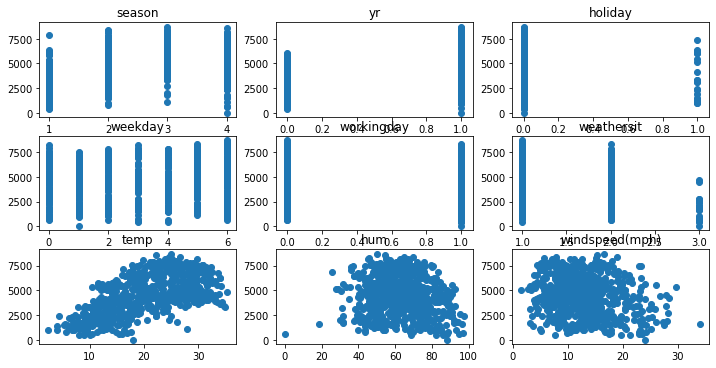

In [34]:
for i, col in enumerate(df.columns[:-1]):
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.subplot(4, 3, i + 1)
    plt.scatter(df[col], df['cnt'])
    plt.title(col)

In [35]:
X, y = df.drop('cnt', axis=1).values, df['cnt'].values

In [36]:
train_part_size = int(.75 * X.shape[0])

X_train, X_valid = X[:train_part_size, :], X[train_part_size:, :]
y_train, y_valid = y[:train_part_size], y[train_part_size:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [37]:
linreg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
np.sqrt(mean_squared_error(y_valid, linreg.predict(X_valid_scaled)))

1108.94606939726

If you delete the columns ['mnth', 'windspeed (ms)', 'atemp'] (correlated by sns.heatmap), mean_squared_error will change from 1121.79 to 1108.94.(Якщо вилалити стовпці ['mnth', 'windspeed(ms)', 'atemp'] (корелюють по sns.heatmap), то mean_squared_error зміниться з  1121.79 до 1108.94. )

# ***

In [172]:
df1 = []
df1 = data.drop(['mnth', 'windspeed(ms)', 'atemp'], axis=1)
df1['temp-weathersit'] = (df1['temp']-df1['weathersit'])**8
#невдалі спроби:
#df1['temp*2/cnt'] = df1['temp']**2/df1['windspeed(mph)']**2
#df1 = df1.drop(['temp', 'windspeed(mph)'], axis=1)
#df1['temp/windspeed(mph)'] = (df1['temp']+df1['windspeed(mph)'])/2
#df1 = df1.drop(['temp', 'windspeed(mph)'], axis=1)
#df1['1/3'] = (df1['season']+df1['holiday']+df1['workingday'])/3
#df1 = df1.drop(['season', 'holiday', 'workingday'], axis=1)
#df1['hum'] = df1['hum']**0.5 - df1['weathersit']
#df1=df.drop(['hum'], axis=1)
#df1['cnt1'] = np.sqrt((df1['temp']-df1['weathersit'])**2)
#df1['temp-weathersit'] = (df1['temp']-df1['weathersit'])**2
#df1['temp-weathersit'] = (df1['temp']-df1['weathersit'])**6
#df1['temp-weathersit'] = (df1['temp']-df1['weathersit'])**6
df1['cnt0.5'] = df1['cnt']**0.5
#df1['holiday-workingday'] = (df1['holiday']+df1['workingday'])/2
#df1 = data.drop(['holiday', 'workingday'], axis=1)
#df1.fillna(0)
#df = df.drop(['temp', 'windspeed(mph)'], axis=1)
# нова фіча
df1

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed(mph),cnt,temp-weathersit,cnt0.5
0,1,0,0,6,0,2,14.110847,80.5833,10.749882,985,4.628030e+08,31.384710
1,1,0,0,0,0,2,14.902598,69.6087,16.652113,801,7.680992e+08,28.301943
2,1,0,0,1,1,1,8.050924,43.7273,16.636703,1349,6.108974e+06,36.728735
3,1,0,0,2,1,1,8.200000,59.0435,10.739832,1562,7.222041e+06,39.522146
4,1,0,0,3,1,1,9.305237,43.6957,12.522300,1600,2.263686e+07,40.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,0,4,1,2,10.420847,65.2917,23.458911,2114,2.528403e+07,45.978256
727,1,1,0,5,1,2,10.386653,59.0000,10.416557,3095,2.447425e+07,55.632724
728,1,1,0,6,0,2,10.386653,75.2917,8.333661,1341,2.447425e+07,36.619667
729,1,1,0,0,0,1,10.489153,48.3333,23.500518,1796,6.573847e+07,42.379240


In [173]:
#df1 = df1.drop(['temp', 'windspeed(mph)'], axis=1)
X, y = df1.drop('cnt', axis=1).values, df1['cnt'].values

train_part_size = int(.7 * X.shape[0])
X_train, X_valid = X[:train_part_size, :], X[train_part_size:, :]
y_train, y_valid = y[:train_part_size], y[train_part_size:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

linreg.fit(X_train_scaled, y_train)

np.sqrt(mean_squared_error(y_valid, linreg.predict(X_valid_scaled)))


517.641494436104

In [174]:
#df1['holiday_weekday_workingday_weathersit'] = (df1['holiday']+df1['weekday']+ df1['workingday']+df1['weathersit'])/4
#df1 = df1.drop(['holiday', 'weekday', 'workingday', 'weathersit'], axis=1)


In [175]:
def train_validate_report(model, X_train_scaled, y_train,
                         X_valid_scaled, y_valid, feature_names,
                         forest=False):
    """
    For linear models and regression trees
    """
    model.fit(X_train_scaled, y_train)
    print("MSE=%f" % np.sqrt(mean_squared_error(y_valid, 
                                     model.predict(X_valid_scaled))))
    print("Model coefficients:")
    coef = model.feature_importances_ if forest else model.coef_
    coef_name = 'Importance' if forest else 'Coef'

    print(pd.DataFrame(coef, 
             feature_names, columns=[coef_name]).sort_values(by=coef_name,
                                                        ascending=False))

In [176]:
train_validate_report(lasso, X_train_scaled, y_train,
                         X_valid_scaled, y_valid, 
                      feature_names=df1.columns[:-1])

MSE=517.434478
Model coefficients:
                        Coef
temp-weathersit  1513.025146
temp               85.378033
yr                 55.816558
weekday            23.245121
weathersit          5.201871
holiday            -0.000000
windspeed(mph)    -17.358495
hum               -23.659964
workingday        -28.431539
season            -34.933220
cnt               -52.719485


In [177]:
train_validate_report(ridge_cv, X_train_scaled, y_train,
                         X_valid_scaled, y_valid, 
                      feature_names=df1.columns[:-1])

MSE=516.774566
Model coefficients:
                        Coef
temp-weathersit  1491.998666
temp              108.377137
yr                 66.506224
weekday            25.098957
weathersit          3.853489
holiday            -1.795622
windspeed(mph)    -23.097485
workingday        -29.458417
hum               -31.049699
season            -31.356104
cnt               -64.258768


In [178]:
forest = RandomForestRegressor(random_state=17, n_estimators=400)
train_validate_report(forest, X_train, y_train,
                         X_valid, y_valid, 
                      feature_names=df1.columns[:-1], forest=True)

MSE=120.020332
Model coefficients:
                   Importance
temp-weathersit  9.992481e-01
windspeed(mph)   4.195736e-04
hum              6.951571e-05
temp             6.604344e-05
cnt              6.547147e-05
weathersit       5.717476e-05
weekday          3.873131e-05
workingday       1.621178e-05
season           1.593215e-05
yr               2.831079e-06
holiday          3.759472e-07


In [179]:
forest = RandomForestRegressor(random_state=17, n_estimators=600)
train_validate_report(forest, X_train, y_train,
                         X_valid, y_valid, 
                      feature_names=df1.columns[:-1], forest=True)

MSE=118.733418
Model coefficients:
                   Importance
temp-weathersit  9.992337e-01
windspeed(mph)   4.261073e-04
hum              7.197245e-05
cnt              6.675875e-05
temp             6.602977e-05
weathersit       5.734121e-05
weekday          3.845636e-05
season           2.024235e-05
workingday       1.620607e-05
yr               2.789475e-06
holiday          4.157805e-07


In [180]:
forest = RandomForestRegressor(random_state=17, n_estimators=350, min_samples_split=2)
train_validate_report(forest, X_train, y_train,
                         X_valid, y_valid, 
                      feature_names=df1.columns[:-1], forest=True)

MSE=121.766238
Model coefficients:
                   Importance
temp-weathersit  9.992303e-01
windspeed(mph)   4.393946e-04
temp             6.871911e-05
cnt              6.618186e-05
hum              6.522607e-05
weathersit       5.560123e-05
weekday          3.822605e-05
workingday       1.654613e-05
season           1.636171e-05
yr               3.003960e-06
holiday          4.026492e-07



For RandomForestRegressor, the optimal parameter is n_estimators = 400. If you take more (600) or less (350), the MSE worsens.
At min_samples_split> 2, it also worsens.
(Для RandomForestRegressor оптимальный параметр n_estimators=400. Если брать больше (600) или меньше(350) MSE ухудшается.
При min_samples_split >2, тоже ухудшается.)


If you take features that are almost uncorrelated and create a new one (df1 ['temp-weathersit'] = (df1 ['temp'] - df1 ['temp-weathersit']) ** 8,8 degree is the most optimal in this case ), we will greatly improve the result to MSE = 898.
(Якщо взяти фічі, які майже не корелюють і з них створити нову (df1['temp-weathersit'] = (df1['temp']-df1['weathersit'])**8, 8 степінь - сама оптимальна в даному випадку), то ми значно покращимо результат до MSE=898.)

If you take the feature that is least correlated with others and create a new one (df1 ['temp-weathersit'] = (df1 ['temp'] - df1 ['weathersit']) ** 8,8 degree is the most optimal in this case) then we will greatly improve the result to MSE = 517 (model = lasso) and to MSE = 118 (model = RandomForestRegressor). 
(Якщо взяти фічу, яка найменше кореює з іншими і створити нову (df1['temp-weathersit'] = (df1['temp']-df1['weathersit'])**8, 8 степінь - сама оптимальна в даному випадку), то ми значно покращимо результат до MSE=517 (model=lasso) and до MSE=118 (model=RandomForestRegressor).